# Setup

In [1]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
#pd.options.mode.copy_on_write = True
'''
from patientdata.PatientData import PatientData
from datetime import datetime, timedelta
import json
#from offline_checks import OfflineChecks
from telegram.telegram_manager import TelegramManager
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
from io import BytesIO
from IPython.display import Image
from scipy.stats import wasserstein_distance
import plotly.express as px
import math
'''

'\nfrom patientdata.PatientData import PatientData\nfrom datetime import datetime, timedelta\nimport json\n#from offline_checks import OfflineChecks\nfrom telegram.telegram_manager import TelegramManager\nimport os\nimport pandas as pd\nimport numpy as np\n\nimport matplotlib.pyplot as plt\nfrom datetime import datetime, timedelta\nimport networkx as nx\nimport matplotlib.pyplot as plt\nimport pygraphviz as pgv\nfrom io import BytesIO\nfrom IPython.display import Image\nfrom scipy.stats import wasserstein_distance\nimport plotly.express as px\nimport math\n'

# Helper functions

In [3]:
def map_part_of_day(hour):
    intervals = [(6, 10), (10, 13), (13, 16), (16, 19), (19, 21), (21, 24), (0, 6)]
    labels = ['early morning', 'late morning', 'early afternoon', 'late afternoon', 'early evening', 'late evening', 'night']
    for interval, label in zip(intervals, labels):
        if interval[0] <= hour < interval[1]:
            return label

# Preprocessing

In [4]:
with open('patientdata/sensing.json') as json_file:
    sensing = json.load(json_file)
subject_ids = list(sensing.keys())    

In [5]:
raw_data_path = "DATA/"
preprocessed_data_path = "PREPROCESSED_DATA/"
if not os.path.exists(preprocessed_data_path):
    os.makedirs(preprocessed_data_path)

## Smart plugs (from time series to events)

### Microwave

In [6]:
microwave_thresholds = {
    "1": 1500,
    "2": None,
    "3": 1000,
    "4": 1000,
    "5": 1200,
}

SUBJECT 1


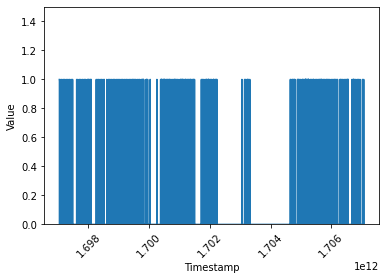

SUBJECT 2
MICROWAVE FILE NOT EXISTING FOR SUBJECT 2
SUBJECT 3


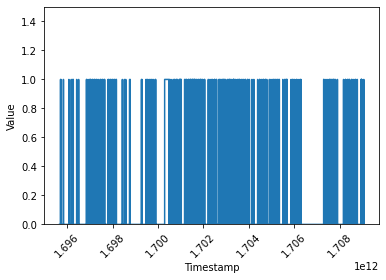

SUBJECT 4


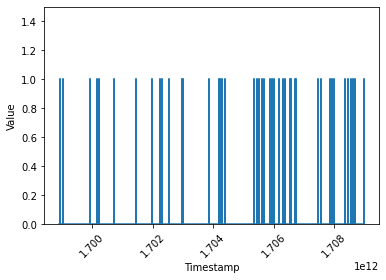

SUBJECT 5


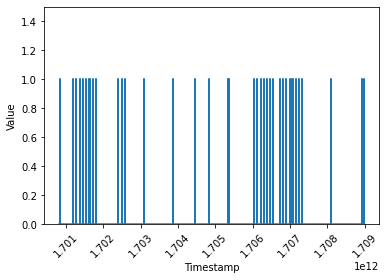

SUBJECT 7
MICROWAVE FILE NOT EXISTING FOR SUBJECT 7


In [7]:
for subject_id in subject_ids:
    print("SUBJECT "+subject_id)
    try:
        microwave_data_path = f"{raw_data_path}subject_{subject_id}/environmentals/Microwave.csv"
        microwave_df = pd.read_csv(microwave_data_path)
        microwave_df.drop(microwave_df[microwave_df.sensor_status == "unavailable"].index, inplace=True)
        microwave_df.loc[:, 'sensor_status'] = microwave_df.loc[:, 'sensor_status'].apply(lambda x: 1 if float(x) > microwave_thresholds[subject_id] else 0)
        microwave_df['is_change'] = microwave_df['sensor_status'].ne(microwave_df['sensor_status'].shift())
        df_result = microwave_df[microwave_df['is_change']].drop(columns='is_change')
    
        plt.step(df_result['ts'], df_result['sensor_status'], linestyle='-', where='post')
        plt.ylim(ymin=0, ymax=1.5)
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.xticks(rotation=45)
        plt.show()
    
        if not os.path.exists(f"{preprocessed_data_path}subject_{subject_id}/environmentals/"):
            os.makedirs(f"{preprocessed_data_path}subject_{subject_id}/environmentals/")
        microwave_events_path = f"{preprocessed_data_path}subject_{subject_id}/environmentals/Microwave_events.csv"
        df_result['sensor_status'] = df_result['sensor_status'].apply(lambda x: 'on' if x == 1 else 'off')
        df_result.to_csv(microwave_events_path, index=False, header=True)
        
    except FileNotFoundError:
        print("MICROWAVE FILE NOT EXISTING FOR SUBJECT "+subject_id)

### PlugTvHall

In [8]:
tv_thresholds = {
    "1": 30,
    "2": 60,
    "3": 15,
    "4": None, 
    "5": 45
}

SUBJECT 1


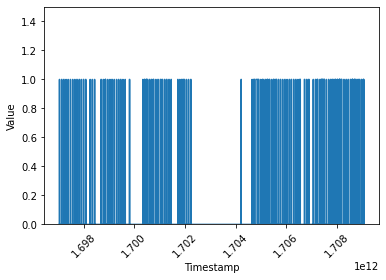

SUBJECT 2


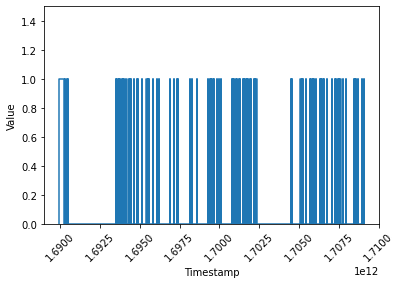

SUBJECT 3


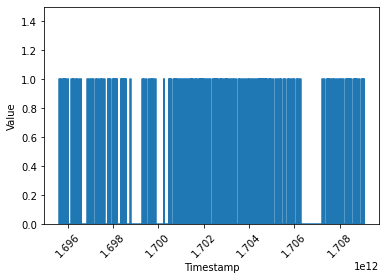

SUBJECT 4
PLUG TV HALL FILE NOT EXISTING FOR SUBJECT 4
SUBJECT 5


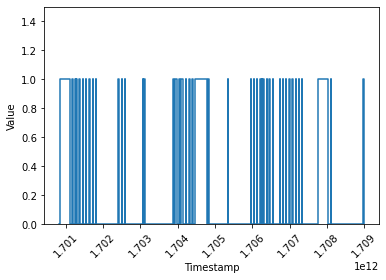

SUBJECT 7


KeyError: '7'

In [9]:
for subject_id in subject_ids:
    print("SUBJECT "+subject_id)
    try:
        tv_data_path = f"{raw_data_path}subject_{subject_id}/environmentals/PlugTvHall.csv"
        tv_df = pd.read_csv(tv_data_path)
        tv_df.drop(tv_df[tv_df.sensor_status == "unavailable"].index, inplace=True)
        tv_df.loc[:, 'sensor_status'] = tv_df.loc[:, 'sensor_status'].apply(lambda x: 1 if float(x) > tv_thresholds[subject_id] else 0)
        tv_df['is_change'] = tv_df['sensor_status'].ne(tv_df['sensor_status'].shift())
        df_result = tv_df[tv_df['is_change']].drop(columns='is_change')
    
        plt.step(df_result['ts'], df_result['sensor_status'], linestyle='-', where='post')
        plt.ylim(ymin=0, ymax=1.5)
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.xticks(rotation=45)
        plt.show()
    
        if not os.path.exists(f"{preprocessed_data_path}subject_{subject_id}/environmentals/"):
            os.makedirs(f"{preprocessed_data_path}subject_{subject_id}/environmentals/")
        tv_events_path = f"{preprocessed_data_path}subject_{subject_id}/environmentals/PlugTvHall_events.csv"
        df_result['sensor_status'] = df_result['sensor_status'].apply(lambda x: 'on' if x == 1 else 'off')
        df_result.to_csv(tv_events_path, index=False, header=True)
        
    except FileNotFoundError:
        print("PLUG TV HALL FILE NOT EXISTING FOR SUBJECT "+subject_id)

### CoffeMachine

In [ ]:
coffe_machine_thresholds = {
    "1": None,
    "2": None,
    "3": 800,
    "4": None, 
    "5": None
}

In [ ]:
for subject_id in subject_ids:
    print("SUBJECT "+subject_id)
    try:
        coffe_machine_data_path = f"{raw_data_path}subject_{subject_id}/environmentals/CoffeMachine.csv"
        coffe_machine_df = pd.read_csv(coffe_machine_data_path)
        coffe_machine_df.drop(coffe_machine_df[coffe_machine_df.sensor_status == "unavailable"].index, inplace=True)
        coffe_machine_df.loc[:, 'sensor_status'] = coffe_machine_df.loc[:, 'sensor_status'].apply(lambda x: 1 if float(x) > coffe_machine_thresholds[subject_id] else 0)
        coffe_machine_df['is_change'] = coffe_machine_df['sensor_status'].ne(coffe_machine_df['sensor_status'].shift())
        df_result = coffe_machine_df[coffe_machine_df['is_change']].drop(columns='is_change')
    
        plt.step(df_result['ts'], df_result['sensor_status'], linestyle='-', where='post')
        plt.ylim(ymin=0, ymax=1.5)
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.xticks(rotation=45)
        plt.show()
    
        if not os.path.exists(f"{preprocessed_data_path}subject_{subject_id}/environmentals/"):
            os.makedirs(f"{preprocessed_data_path}subject_{subject_id}/environmentals/")
        coffe_machine_events_path = f"{preprocessed_data_path}subject_{subject_id}/environmentals/CoffeMachine_events.csv"
        df_result['sensor_status'] = df_result['sensor_status'].apply(lambda x: 'on' if x == 1 else 'off')
        df_result.to_csv(coffe_machine_events_path, index=False, header=True)
        
    except FileNotFoundError:
        print("COFFE MACHINE FILE NOT EXISTING FOR SUBJECT "+subject_id)

### Printer

In [ ]:
printer_thresholds = {
    "1": None,
    "2": None,
    "3": 250,
    "4": None, 
    "5": None
}

In [ ]:
for subject_id in subject_ids:
    print("SUBJECT "+subject_id)
    try:
        printer_data_path = f"{raw_data_path}subject_{subject_id}/environmentals/Printer.csv"
        printer_df = pd.read_csv(printer_data_path)
        printer_df.drop(printer_df[printer_df.sensor_status == "unavailable"].index, inplace=True)
        printer_df.loc[:, 'sensor_status'] = printer_df.loc[:, 'sensor_status'].apply(lambda x: 1 if float(x) > printer_thresholds[subject_id] else 0)
        printer_df['is_change'] = printer_df['sensor_status'].ne(printer_df['sensor_status'].shift())
        df_result = printer_df[printer_df['is_change']].drop(columns='is_change')
    
        plt.step(df_result['ts'], df_result['sensor_status'], linestyle='-', where='post')
        plt.ylim(ymin=0, ymax=1.5)
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.xticks(rotation=45)
        plt.show()
        
        if not os.path.exists(f"{preprocessed_data_path}subject_{subject_id}/environmentals/"):
            os.makedirs(f"{preprocessed_data_path}subject_{subject_id}/environmentals/")
        printer_events_path = f"{preprocessed_data_path}subject_{subject_id}/environmentals/printer_events.csv"
        df_result['sensor_status'] = df_result['sensor_status'].apply(lambda x: 'on' if x == 1 else 'off')
        df_result.to_csv(printer_events_path, index=False, header=True)
        
    except FileNotFoundError:
        print("PRINTER FILE NOT EXISTING FOR SUBJECT "+subject_id)

### Dishwasher

In [ ]:
dishwasher_thresholds = {
    "1": 1000,
    "2": None,
    "3": None,
    "4": None, 
    "5": None
}

In [ ]:
for subject_id in subject_ids:
    print("SUBJECT "+subject_id)
    try:
        printer_data_path = f"{raw_data_path}subject_{subject_id}/environmentals/WashingMachine.csv"
        printer_df = pd.read_csv(printer_data_path)
        
        printer_df.loc[:, 'sensor_status'] = printer_df.loc[:, 'sensor_status'].apply(lambda x: 1 if x > dishwasher_thresholds[subject_id] else 0)
        printer_df['is_change'] = printer_df['sensor_status'].ne(printer_df['sensor_status'].shift())
        df_result = printer_df[printer_df['is_change']].drop(columns='is_change')
    
        plt.step(df_result['ts'], df_result['sensor_status'], linestyle='-', where='post')
        plt.ylim(ymin=0, ymax=1.5)
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.xticks(rotation=45)
        plt.show()
    
        if not os.path.exists(f"{preprocessed_data_path}subject_{subject_id}/environmentals/"):
            os.makedirs(f"{preprocessed_data_path}subject_{subject_id}/environmentals/")
        printer_events_path = f"{preprocessed_data_path}subject_{subject_id}/environmentals/washingMachine_events.csv"
        df_result['sensor_status'] = df_result['sensor_status'].apply(lambda x: 'on' if x == 1 else 'off')
        df_result.to_csv(printer_events_path, index=False, header=True)
        
    except FileNotFoundError:
        print("DISHWASHER FILE NOT EXISTING FOR SUBJECT "+subject_id)

## Magnetic and Motion

In [10]:
subjects_folders = sorted(list(os.walk(raw_data_path))[0][1])
data_paths = {}

In [11]:
print("Discovering data folders...")
for i, folder in enumerate(subjects_folders):
    print(folder)
    data_paths[i+1] = []
    for f in sorted(list(os.walk(raw_data_path+folder))[0][1]):
        print("|__ "+f)
        for file in sorted(list(os.walk(raw_data_path+folder+"/"+f))[0][2]):
            print("  |___ "+file) 
            data_paths[i+1].append(raw_data_path+folder+"/"+f+"/"+file)

Discovering data folders...
subject_1
|__ environmentals
  |___ Dishes_Glasses.csv
  |___ FoodStorage.csv
  |___ Freezer.csv
  |___ HouseEntrance.csv
  |___ Microwave.csv
  |___ Microwave_events.csv
  |___ MotionBathroom.csv
  |___ MotionBedroom.csv
  |___ MotionKitchen.csv
  |___ MotionLivingroom.csv
  |___ PlugTvHall.csv
  |___ PlugTvHall_events.csv
  |___ Refrigerator.csv
  |___ Shower_Hum_Temp.csv
  |___ Silverware.csv
  |___ WashingMachine.csv
  |___ washingMachine_events.csv
|__ sleep
  |___ sleep_events.csv
|__ smartwatch
  |___ smartwatch_active.csv
|__ toothbrush
  |___ toothbrush.csv
subject_2
|__ environmentals
  |___ Dishes_Silverware.csv
  |___ FoodStorage.csv
  |___ HouseEntrance.csv
  |___ Hum_Temp_Bath.csv
  |___ Hum_Temp_Stove.csv
  |___ Medicines.csv
  |___ MotionBathroom.csv
  |___ MotionBedroom.csv
  |___ MotionKitchen.csv
  |___ MotionLivingroom.csv
  |___ MotionOtherroom.csv
  |___ PlugTvHall.csv
  |___ PlugTvHall_events.csv
  |___ Refrigerator.csv
|__ sleep
  |__

In [12]:
file_to_exclude = [
    "Microwave.csv", 
    "PlugTvHall.csv", 
    "Shower_Hum_Temp.csv", 
    "Hum_Temp_Bath.csv", 
    "Hum_Temp_Stove.csv",
    "CoffeMachine.csv", 
    "Printer.csv", 
    "Stove_Hum_Temp.csv",
    "WashingMachine.csv",
    "smartwatch_active.csv",
    "toothbrush.csv",
    "sleep_events.csv"
]

### Manage "unavailable" and "unknown" sensor status
we remove events of type unavailable and unknown, if the previous and the next event are of different types (on-off or off-on) we do not make no further changes, if the previous and the next event are of the same type (on-on or off-off), the next event is also removed

In [13]:
data = {}
for subject in data_paths.keys():
    data[subject] = []
    print(f"--- CHECKING DATA FOR SUBJECT {subject} ---")
    for path in data_paths[subject]:
        if all(st not in path for st in file_to_exclude):
            df = pd.read_csv(path) 
            print(path)
            wrong_data = df[(df.sensor_status!="on") & (df.sensor_status!="off")]
            wrong_data_indexes = list(df[(df.sensor_status!="on") & (df.sensor_status!="off")].index)
            df.drop(wrong_data_indexes, inplace=True)
            for i in reversed(list(df.index)[1:]):
                if df.loc[i].sensor_status == df.iloc[df.index.get_loc(i)-1].sensor_status:
                    df.drop([i], inplace=True)
            data[subject].append(df)
    print()

--- CHECKING DATA FOR SUBJECT 1 ---
DATA/subject_1/environmentals/Dishes_Glasses.csv
DATA/subject_1/environmentals/FoodStorage.csv
DATA/subject_1/environmentals/Freezer.csv
DATA/subject_1/environmentals/HouseEntrance.csv
DATA/subject_1/environmentals/Microwave_events.csv
DATA/subject_1/environmentals/MotionBathroom.csv
DATA/subject_1/environmentals/MotionBedroom.csv
DATA/subject_1/environmentals/MotionKitchen.csv
DATA/subject_1/environmentals/MotionLivingroom.csv
DATA/subject_1/environmentals/PlugTvHall_events.csv
DATA/subject_1/environmentals/Refrigerator.csv
DATA/subject_1/environmentals/Silverware.csv
DATA/subject_1/environmentals/washingMachine_events.csv

--- CHECKING DATA FOR SUBJECT 2 ---
DATA/subject_2/environmentals/Dishes_Silverware.csv
DATA/subject_2/environmentals/FoodStorage.csv
DATA/subject_2/environmentals/HouseEntrance.csv
DATA/subject_2/environmentals/Medicines.csv
DATA/subject_2/environmentals/MotionBathroom.csv
DATA/subject_2/environmentals/MotionBedroom.csv
DATA/sub

### Change data format

In [14]:
for subject in data.keys():
    for df in data[subject]:
        sensor = list(df.sensor_id)[0]
        print(f"{sensor} of patient {subject}")
        if df.iloc[0].sensor_status == "off":
            df = df.iloc[1:]
        mask_on = (df['sensor_status'] == 'on')
        df_on = df[mask_on]
        mask_off = (df['sensor_status'] == 'off')
        df_off = df[mask_off]
        df_on.rename(columns={'ts': 'ts_on'}, inplace=True)
        df_off.rename(columns={'ts': 'ts_off'}, inplace=True)
        df_on.reset_index(inplace=True)
        df_off.reset_index(inplace=True)
        df_conc = pd.concat([df_on, df_off['ts_off']], axis=1)
        df_conc.drop('index', axis=1, inplace=True)
        df_conc['duration_ms'] = df_conc.ts_off - df_conc.ts_on
        df_conc.ts_on = pd.to_datetime(df_conc.ts_on, unit='ms')
        df_conc.ts_off = pd.to_datetime(df_conc.ts_off, unit='ms')
        df_conc = df_conc[['sensor_id', 'subject_id', 'sensor_status', 'ts_on', 'ts_off', 'duration_ms']]
        df_conc['part_of_day'] = df_conc.ts_on.dt.hour.apply(map_part_of_day)
        
        path = f"{preprocessed_data_path}subject_{subject}/environmentals/"
        if not os.path.exists(path):
            os.makedirs(path)
        df.to_csv(f"{path}/{sensor}.csv", mode='w', index=False, header=True)
        print("created file: "+ f"{path}{sensor}.csv")

Dishes_Glasses of patient 1
created file: PREPROCESSED_DATA/subject_1/environmentals/Dishes_Glasses.csv
FoodStorage of patient 1
created file: PREPROCESSED_DATA/subject_1/environmentals/FoodStorage.csv
Freezer of patient 1
created file: PREPROCESSED_DATA/subject_1/environmentals/Freezer.csv
HouseEntrance of patient 1
created file: PREPROCESSED_DATA/subject_1/environmentals/HouseEntrance.csv
Microwave of patient 1
created file: PREPROCESSED_DATA/subject_1/environmentals/Microwave.csv
MotionBathroom of patient 1
created file: PREPROCESSED_DATA/subject_1/environmentals/MotionBathroom.csv
MotionBedroom of patient 1
created file: PREPROCESSED_DATA/subject_1/environmentals/MotionBedroom.csv
MotionKitchen of patient 1
created file: PREPROCESSED_DATA/subject_1/environmentals/MotionKitchen.csv
MotionLivingroom of patient 1
created file: PREPROCESSED_DATA/subject_1/environmentals/MotionLivingroom.csv
PlugTvHall of patient 1
created file: PREPROCESSED_DATA/subject_1/environmentals/PlugTvHall.csv


IndexError: list index out of range

## Sleep (NO PREPROCESSING)

In [ ]:
for subject_id in subject_ids:
    print("COPYING DATA FOR SUBJECT "+subject_id)
    sleep_data_path = f"{raw_data_path}subject_{subject_id}/sleep/sleep_events.csv"
    sleep_df = pd.read_csv(sleep_data_path)
    if not os.path.exists(f"{preprocessed_data_path}subject_{subject_id}/sleep/"):
        os.makedirs(f"{preprocessed_data_path}subject_{subject_id}/sleep/")
    sleep_df.to_csv(f"{preprocessed_data_path}subject_{subject_id}/sleep/sleep_events.csv", index=False, header=True)

## Smartwatch (NO PREPROCESSING)

In [ ]:
for subject_id in subject_ids:
    print("COPYING DATA FOR SUBJECT "+subject_id)
    smartwatch_data_path = f"{raw_data_path}subject_{subject_id}/smartwatch/smartwatch_active.csv"
    smartwatch_df = pd.read_csv(smartwatch_data_path)
    if not os.path.exists(f"{preprocessed_data_path}subject_{subject_id}/smartwatch/"):
        os.makedirs(f"{preprocessed_data_path}subject_{subject_id}/smartwatch/")
    smartwatch_df.to_csv(f"{preprocessed_data_path}subject_{subject_id}/smartwatch/smartwatch_active.csv", index=False, header=True)

## Toothbrush (NO PREPROCESSING)

In [ ]:
for subject_id in subject_ids:
    print("COPYING DATA FOR SUBJECT "+subject_id)
    toothbrush_data_path = f"{raw_data_path}subject_{subject_id}/toothbrush/toothbrush.csv"
    toothbrush_df = pd.read_csv(toothbrush_data_path)
    if not os.path.exists(f"{preprocessed_data_path}subject_{subject_id}/toothbrush/"):
        os.makedirs(f"{preprocessed_data_path}subject_{subject_id}/toothbrush/")   
    toothbrush_df.to_csv(f"{preprocessed_data_path}subject_{subject_id}/toothbrush/toothbrush.csv", index=False, header=True)